In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy as scipy
import seaborn as sns
import decimal
import glob as glob
from scipy.stats import norm

def set_style():
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    sns.set_context("paper")
    
    # Set the font to be serif, rather than sans
    sns.set(font='serif')
    
    # Make the background white, and specify the
    # specific font family
    sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
    })
    
    sns.set_style("ticks")
    sns.despine()
    
set_style()

<Figure size 432x288 with 0 Axes>

In [2]:
h2kcal = 627.509
jmol2kcal = 0.000239006
R = 8.3145 #J /K*mol

def round_scientific(x):
    y = []
    for i in x:
        y.append('%.3E' % decimal.Decimal(i))
    return y

def exc_set(x,exclude):
    # Scans list x, returns a list without strings in pick
    check = [i for i in x if not any([e for e in exclude if e in i])]
    return check

def inc_set(x,include):
    # Scans list x, returns a list with strings in pick
    check = [i for i in x if any([e for e in include if e in i])]
    return check

def crunch_elec(x):
    e_list = []
    for i in np.arange(len(x)):
        e_list.append(float(x[i][-17:]))
    e_list = np.array(e_list)    
    return e_list

def crunch_vib_e(x):
    e_list = []
    for i in np.arange(len(x)):
        e_list.append(float(x[i][-14:-2]))
    e_list = np.array(e_list)    
    return e_list

def crunch_gibbs(x):
    final_list = []
    for i in np.arange(len(x)):
        df = pd.read_csv(x[i], skiprows=1, header=None, delim_whitespace=True)
        df[2] = df[1]*h2kcal
        df.columns = ['Temp', 'H', 'kcal']
        kcal = float(df['kcal'])
        final_list.append(kcal)
    final_list = np.array(final_list)      
    return final_list

# Positive - X first

In [3]:
# At 10^9 V/m px
# For step-wise G:C dpt, include this list
step = ['rep_101', 'rep_109', 'rep_111', 'rep_112', 'rep_113', 'rep_114', 'rep_117', 'rep_118', 'rep_120', 'rep_122']
# For concerted G:C dpt, include this list
conc = ['rep_115']
# For concerted G:C spt, include this this
spt = ['rep_102', 'rep_103', 'rep_104', 'rep_105', 'rep_106', 'rep_107',  'rep_108',  'rep_110', 'rep_116', 'rep_119', 'rep_121', 'rep_123', 'rep_124', 'rep_125' ]
len(step), len(conc), len(spt)

(10, 1, 14)

## Step-wise DPT electric

In [4]:
raw_elec_txt = sorted(glob.glob('pos_x_9/*_e.txt'))

raw_e_reac = inc_set((pd.read_csv(raw_elec_txt[0], header=None)[0]), step)
raw_e_ts1  = inc_set((pd.read_csv(raw_elec_txt[1], header=None)[0]), step)
raw_e_int  = inc_set((pd.read_csv(raw_elec_txt[2], header=None)[0]), step)
raw_e_ts2  = inc_set((pd.read_csv(raw_elec_txt[3], header=None)[0]), step)
raw_e_prod = inc_set((pd.read_csv(raw_elec_txt[4], header=None)[0]), step)

In [5]:
len(raw_e_reac), len(raw_e_ts1), len(raw_e_int), len(raw_e_ts2), len(raw_e_prod)

(10, 10, 10, 10, 10)

In [6]:
for i in range(len(raw_e_reac)):
    print(raw_e_reac[i], raw_e_ts1[i])

rep_101/a_reac/reac_opt_sum.txt: Final converged energy:    -975.162975108624 rep_101/b_ts1/dimer_sum.txt: Final converged energy:    -975.143414273575
rep_109/a_reac/reac_opt_sum.txt: Final converged energy:    -977.761503808864 rep_109/b_ts1/dimer_sum.txt: Final converged energy:    -977.741283580119
rep_111/a_reac/reac_opt_sum.txt: Final converged energy:    -977.649353594517 rep_111/b_ts1/dimer_sum.txt: Final converged energy:    -977.627389783528
rep_112/a_reac/reac_opt_sum.txt: Final converged energy:    -977.261929656765 rep_112/b_ts1/dimer_sum.txt: Final converged energy:    -977.242836133410
rep_113/a_reac/reac_opt_sum.txt: Final converged energy:    -975.997543810290 rep_113/b_ts1/dimer_sum.txt: Final converged energy:    -975.973005198207
rep_114/a_reac/reac_opt_sum.txt: Final converged energy:    -978.122122328076 rep_114/b_ts1/dimer_sum.txt: Final converged energy:    -978.100480127470
rep_117/a_reac/reac_opt_sum.txt: Final converged energy:    -976.570290482386 rep_117/b_

In [7]:
h_e_reac = crunch_elec(raw_e_reac)
h_e_ts1  = crunch_elec(raw_e_ts1)
h_e_int  = crunch_elec(raw_e_int)
h_e_ts2  = crunch_elec(raw_e_ts2)
h_e_prod = crunch_elec(raw_e_prod)

In [8]:
h_e_reac

array([-975.16297511, -977.76150381, -977.64935359, -977.26192966,
       -975.99754381, -978.12212233, -976.57029048, -979.1292451 ,
       -975.90509281, -973.71027982])

In [9]:
step_e_reac = (h_e_reac - h_e_reac)*h2kcal
step_e_ts1  = (h_e_ts1 - h_e_reac)*h2kcal
step_e_int  = (h_e_int - h_e_reac)*h2kcal
step_e_ts2  = (h_e_ts2 - h_e_reac)*h2kcal
step_e_prod = (h_e_prod - h_e_reac)*h2kcal

p_step_e_mean = [ step_e_reac.mean(), step_e_ts1.mean(), step_e_int.mean(), step_e_ts2.mean(), step_e_prod.mean() ]
p_step_e_std = [ 0, step_e_ts1.std(), step_e_int.std(), step_e_ts2.std(), step_e_prod.std() ]

## Step-wise DPT gibbs

In [10]:
raw_gibbs_f1 = sorted(glob.glob('pos_x_9/rep_???/rate/k1f/free_energy_barrier'))
raw_gibbs_r1 = sorted(glob.glob('pos_x_9/rep_???/rate/k1r/free_energy_barrier'))

raw_gibbs_f2 = sorted(glob.glob('pos_x_9/rep_???/rate/k2f/free_energy_barrier'))
raw_gibbs_r2 = sorted(glob.glob('pos_x_9/rep_???/rate/k2r/free_energy_barrier'))

raw_gibbs_f1 = inc_set(raw_gibbs_f1, step)
raw_gibbs_r1 = inc_set(raw_gibbs_r1, step)
raw_gibbs_f2 = inc_set(raw_gibbs_f2, step)
raw_gibbs_r2 = inc_set(raw_gibbs_r2, step)

gibbs_f1 = crunch_gibbs(raw_gibbs_f1)
gibbs_r1 = crunch_gibbs(raw_gibbs_r1)
gibbs_f2 = crunch_gibbs(raw_gibbs_f2)
gibbs_r2 = crunch_gibbs(raw_gibbs_r2)

In [11]:
gibbs_f1, gibbs_r1

(array([ 8.1000581 ,  9.1622421 , 10.57477816,  8.02171631, 12.07363176,
        10.15410637,  8.93300632,  8.2345732 , 11.54909249, 12.2749853 ]),
 array([-0.4716345 ,  0.02817996, -0.22428666, -0.55096763,  1.79991985,
         0.41913379,  0.02528595,  1.01787227,  0.49686034, -0.99319525]))

In [12]:
step_gibbs_ts1  = gibbs_f1
step_gibbs_int  = step_gibbs_ts1 - gibbs_r1
step_gibbs_ts2  = step_gibbs_int + gibbs_f2
step_gibbs_prod = step_gibbs_ts2 - gibbs_r2

In [13]:
len(step_gibbs_ts1), len(step_gibbs_int), len(step_gibbs_ts2), len(step_gibbs_prod)

(10, 10, 10, 10)

In [14]:
p_step_gibbs_mean = [ 0, step_gibbs_ts1.mean(), step_gibbs_int.mean(), step_gibbs_ts2.mean(), step_gibbs_prod.mean() ]
p_step_gibbs_std = [ 0, step_gibbs_ts1.std(), step_gibbs_int.std(), step_gibbs_ts2.std(), step_gibbs_prod.std() ]

In [15]:
p_step_barriers_mean = [ gibbs_f1.mean(), gibbs_r1.mean(), gibbs_f2.mean(), gibbs_r2.mean()]
p_step_barriers_std = [ gibbs_f1.std(), gibbs_r1.std(), gibbs_f2.std(), gibbs_r2.std()]

In [16]:
for i in np.arange(len(p_step_gibbs_mean)):
    #print(nf_step_gibbs_mean[i], nf_step_gibbs_std[i])
    print("%.2f" % p_step_gibbs_mean[i],   "%.2f" % p_step_gibbs_std[i]  )

0.00 0.00
9.91 1.57
9.75 1.60
11.03 1.55
11.47 1.26


## Concerted DPT Electric

In [17]:
raw_elec_txt = sorted(glob.glob('pos_x_9/*_e.txt'))

raw_e_reac = inc_set((pd.read_csv(raw_elec_txt[0], header=None)[0]), conc)
raw_e_ts1  = inc_set((pd.read_csv(raw_elec_txt[1], header=None)[0]), conc)
raw_e_prod = inc_set((pd.read_csv(raw_elec_txt[4], header=None)[0]), conc)

In [18]:
len(raw_e_reac),len(raw_e_ts1),len(raw_e_prod)

(1, 1, 1)

In [19]:
h_e_reac = crunch_elec(raw_e_reac)
h_e_ts1  = crunch_elec(raw_e_ts1)
h_e_prod = crunch_elec(raw_e_prod)

In [20]:
conc_e_reac = (h_e_reac - h_e_reac)*h2kcal
conc_e_ts1  = (h_e_ts1 - h_e_reac)*h2kcal
conc_e_prod = (h_e_prod - h_e_reac)*h2kcal

In [21]:
p_conc_e_mean = [ conc_e_reac.mean(), conc_e_ts1.mean(), conc_e_prod.mean() ]
p_conc_e_std = [ 0, conc_e_ts1.std(), conc_e_prod.std() ]

## Concerted DPT Gibbs

In [22]:
raw_gibbs_f1 = sorted(glob.glob('pos_x_9/rep_???/rate/k1f/free_energy_barrier'))
raw_gibbs_r1 = sorted(glob.glob('pos_x_9/rep_???/rate/k1r/free_energy_barrier'))


raw_gibbs_f1 = inc_set(raw_gibbs_f1, conc)
raw_gibbs_r1 = inc_set(raw_gibbs_r1, conc)

gibbs_f1 = crunch_gibbs(raw_gibbs_f1)
gibbs_r1 = crunch_gibbs(raw_gibbs_r1)

In [23]:
conc_gibbs_ts1  = gibbs_f1
conc_gibbs_prod = conc_gibbs_ts1 - gibbs_r1

In [24]:
conc_gibbs_ts1, conc_gibbs_prod

(array([11.32818524]), array([12.19027832]))

In [25]:
p_conc_gibbs_mean = [ 0, conc_gibbs_ts1.mean(), conc_gibbs_prod.mean() ]
p_conc_gibbs_std = [ 0, conc_gibbs_ts1.std(), conc_gibbs_prod.std() ]

In [26]:
p_conc_gibbs_mean, p_conc_gibbs_std

([0, 11.328185235923245, 12.190278323105133], [0, 0.0, 0.0])

## SPT Electric

In [27]:
raw_elec_txt = sorted(glob.glob('pos_x_9/*_e.txt'))

raw_e_reac = inc_set((pd.read_csv(raw_elec_txt[0], header=None)[0]), spt)
raw_e_ts1  = inc_set((pd.read_csv(raw_elec_txt[1], header=None)[0]), spt)
raw_e_prod = inc_set((pd.read_csv(raw_elec_txt[4], header=None)[0]), spt)

In [28]:
len(raw_e_reac),len(raw_e_ts1),len(raw_e_prod)

(14, 14, 14)

In [29]:
raw_e_reac

['rep_102/a_reac/reac_opt_sum.txt: Final converged energy:    -976.824806745802',
 'rep_103/a_reac/reac_opt_sum.txt: Final converged energy:    -977.616105436879',
 'rep_104/a_reac/reac_opt_sum.txt: Final converged energy:    -977.145539847029',
 'rep_105/a_reac/reac_opt_sum.txt: Final converged energy:    -975.886233042177',
 'rep_106/a_reac/reac_opt_sum.txt: Final converged energy:    -975.874158753037',
 'rep_107/a_reac/reac_opt_sum.txt: Final converged energy:    -976.581110937054',
 'rep_108/a_reac/reac_opt_sum.txt: Final converged energy:    -976.306338714174',
 'rep_110/a_reac/reac_opt_sum.txt: Final converged energy:    -975.630463766076',
 'rep_116/a_reac/reac_opt_sum.txt: Final converged energy:    -977.496292682811',
 'rep_119/a_reac/reac_opt_sum.txt: Final converged energy:    -977.304302178241',
 'rep_121/a_reac/reac_opt_sum.txt: Final converged energy:    -976.162677218725',
 'rep_123/a_reac/reac_opt_sum.txt: Final converged energy:    -978.954221959108',
 'rep_124/a_reac

In [30]:
h_e_reac = crunch_elec(raw_e_reac)
h_e_ts1  = crunch_elec(raw_e_ts1)
h_e_prod = crunch_elec(raw_e_prod)

In [31]:
spt_e_reac = (h_e_reac - h_e_reac)*h2kcal
spt_e_ts1  = (h_e_ts1 - h_e_reac)*h2kcal
spt_e_prod = (h_e_prod - h_e_reac)*h2kcal

In [32]:
spt_e_reac, spt_e_ts1, spt_e_prod

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([11.64824998, 10.20035922, 11.75386267, 13.23810946, 13.24127254,
        11.1780712 ,  9.01733337, 12.5632376 , 10.66380402, 11.34390975,
         8.17717433, 12.07706372, 10.412284  , 11.43297911]),
 array([ 9.75682851,  8.13619594,  9.55813978,  9.7265992 , 11.27058518,
         9.09546629,  6.40307337, 10.59036355,  8.7303753 ,  9.32567263,
         5.93096423,  8.73010667,  9.03068259,  9.67212652]))

In [33]:
p_spt_e_mean = [ spt_e_reac.mean(), spt_e_ts1.mean(), spt_e_prod.mean()]
p_spt_e_std = [ 0, spt_e_ts1.std(), spt_e_prod.std()]

In [34]:
p_spt_e_mean, p_spt_e_std

([0.0, 11.210550783924576, 8.996941409843439],
 [0, 1.3974143932754568, 1.3814980460460138])

## SPT Gibbs

In [35]:
raw_gibbs_f1 = sorted(glob.glob('pos_x_9/rep_???/rate/k1f/free_energy_barrier'))
raw_gibbs_r1 = sorted(glob.glob('pos_x_9/rep_???/rate/k1r/free_energy_barrier'))


raw_gibbs_f1 = inc_set(raw_gibbs_f1, spt)
raw_gibbs_r1 = inc_set(raw_gibbs_r1, spt)

gibbs_f1 = crunch_gibbs(raw_gibbs_f1)
gibbs_r1 = crunch_gibbs(raw_gibbs_r1)

In [36]:
spt_gibbs_ts1  = gibbs_f1
spt_gibbs_prod = spt_gibbs_ts1 - gibbs_r1

In [37]:
spt_gibbs_ts1, spt_gibbs_prod

(array([9.1060844 , 9.69820247, 9.64431445, 9.45653362, 7.89868354,
        6.01620466, 9.44875165, 6.76806364, 8.04172263, 5.08036834,
        8.62016257, 8.42478318]),
 array([ 9.54524574, 10.14880147,  8.85625743, 10.07527063,  8.21559715,
         6.11978804, 10.13051476,  6.38781419,  8.23116581,  4.86009279,
         8.5445048 ,  8.77727265]))

In [38]:
p_spt_gibbs_mean = [ 0, spt_gibbs_ts1.mean(), spt_gibbs_prod.mean() ]
p_spt_gibbs_std = [ 0, spt_gibbs_ts1.std(), spt_gibbs_prod.std() ]

In [39]:
for i in np.arange(len(p_spt_gibbs_mean)):
    #print(nf_step_gibbs_mean[i], nf_step_gibbs_std[i])
    print("%.2f" % p_spt_gibbs_mean[i],   "%.2f" % p_spt_gibbs_std[i]  )

0.00 0.00
8.18 1.45
8.32 1.64


# Negative - X

In [40]:
# For step G:C dpt, include this list
step = ['rep_104', 'rep_108', 'rep_114', 'rep_116', 'rep_119', 'rep_120', 'rep_121', 'rep_123']
print(len(step))
# For concerted G:C dpt, include this list, 115 and 122 has crossover temp above 301 K
conc = ['rep_101', 'rep_102', 'rep_103', 'rep_105', 'rep_106', 'rep_107', 'rep_109', 'rep_110', 'rep_111', 'rep_112', 'rep_113', 'rep_115', 'rep_117', 'rep_118', 'rep_122', 'rep_124', 'rep_125']

print(len(conc))
# For concerted G:C spt, include this this !
spt = []

print(len(spt))

print(len(step+conc))

8
17
0
25


## Step-wise DPT Electric

In [41]:
raw_elec_txt = sorted(glob.glob('neg_x_9/*_e.txt'))

raw_e_reac = inc_set((pd.read_csv(raw_elec_txt[0], header=None)[0]), step)
raw_e_ts1  = inc_set((pd.read_csv(raw_elec_txt[1], header=None)[0]), step)
raw_e_int  = inc_set((pd.read_csv(raw_elec_txt[2], header=None)[0]), step)
raw_e_ts2  = inc_set((pd.read_csv(raw_elec_txt[3], header=None)[0]), step)
raw_e_prod = inc_set((pd.read_csv(raw_elec_txt[4], header=None)[0]), step)

In [42]:
len(raw_e_reac), len(raw_e_ts1), len(raw_e_int), len(raw_e_ts2), len(raw_e_prod)

(8, 8, 8, 8, 8)

In [43]:
h_e_reac = crunch_elec(raw_e_reac)
h_e_ts1  = crunch_elec(raw_e_ts1)
h_e_int  = crunch_elec(raw_e_int)
h_e_ts2  = crunch_elec(raw_e_ts2)
h_e_prod = crunch_elec(raw_e_prod)

In [44]:
step_e_reac = (h_e_reac - h_e_reac)*h2kcal
step_e_ts1  = (h_e_ts1 - h_e_reac)*h2kcal
step_e_int  = (h_e_int - h_e_reac)*h2kcal
step_e_ts2  = (h_e_ts2 - h_e_reac)*h2kcal
step_e_prod = (h_e_prod - h_e_reac)*h2kcal

n_step_e_mean = [ step_e_reac.mean(), step_e_ts1.mean(), step_e_int.mean(), step_e_ts2.mean(), step_e_prod.mean() ]
n_step_e_std = [ 0, step_e_ts1.std(), step_e_int.std(), step_e_ts2.std(), step_e_prod.std() ]

## Step-wise DPT Gibbs

In [45]:
raw_gibbs_f1 = sorted(glob.glob('neg_x_9/rep_???/rate/k1f/free_energy_barrier'))
raw_gibbs_r1 = sorted(glob.glob('neg_x_9/rep_???/rate/k1r/free_energy_barrier'))

raw_gibbs_f2 = sorted(glob.glob('neg_x_9/rep_???/rate/k2f/free_energy_barrier'))
raw_gibbs_r2 = sorted(glob.glob('neg_x_9/rep_???/rate/k2r/free_energy_barrier'))

raw_gibbs_f1 = inc_set(raw_gibbs_f1, step)
raw_gibbs_r1 = inc_set(raw_gibbs_r1, step)
raw_gibbs_f2 = inc_set(raw_gibbs_f2, step)
raw_gibbs_r2 = inc_set(raw_gibbs_r2, step)

gibbs_f1 = crunch_gibbs(raw_gibbs_f1)
gibbs_r1 = crunch_gibbs(raw_gibbs_r1)
gibbs_f2 = crunch_gibbs(raw_gibbs_f2)
gibbs_r2 = crunch_gibbs(raw_gibbs_r2)

In [46]:
step_gibbs_ts1  = gibbs_f1
step_gibbs_int  = step_gibbs_ts1 - gibbs_r1
step_gibbs_ts2  = step_gibbs_int + gibbs_f2
step_gibbs_prod = step_gibbs_ts2 - gibbs_r2

In [47]:
n_step_gibbs_mean = [ 0, step_gibbs_ts1.mean(), step_gibbs_int.mean(), step_gibbs_ts2.mean(), step_gibbs_prod.mean() ]
n_step_gibbs_std = [ 0, step_gibbs_ts1.std(), step_gibbs_int.std(), step_gibbs_ts2.std(), step_gibbs_prod.std() ]

In [48]:
for i in np.arange(len(n_step_e_mean)):
    print(n_step_gibbs_mean[i], n_step_gibbs_std[i])

0 0
11.61402847979193 1.5916822913496076
12.128013397450182 1.8113464824981622
12.537589432814812 2.4119565857695062
12.500956457173528 2.4732577719814386


## Concerted DPT Electric

In [49]:
raw_elec_txt = sorted(glob.glob('neg_x_9/*_e.txt'))

raw_e_reac = inc_set((pd.read_csv(raw_elec_txt[0], header=None)[0]), conc)
raw_e_ts1  = inc_set((pd.read_csv(raw_elec_txt[1], header=None)[0]), conc)
raw_e_prod = inc_set((pd.read_csv(raw_elec_txt[4], header=None)[0]), conc)

In [50]:
h_e_reac = crunch_elec(raw_e_reac)
h_e_ts1  = crunch_elec(raw_e_ts1)
h_e_prod = crunch_elec(raw_e_prod)

In [51]:
conc_e_reac = (h_e_reac - h_e_reac)*h2kcal
conc_e_ts1  = (h_e_ts1 - h_e_reac)*h2kcal
conc_e_prod = (h_e_prod - h_e_reac)*h2kcal

In [52]:
n_conc_e_mean = [ conc_e_reac.mean(), conc_e_ts1.mean(), conc_e_prod.mean() ]
n_conc_e_std = [ 0, conc_e_ts1.std(), conc_e_prod.std() ]

## Concerted DPT Gibbs

In [53]:
raw_gibbs_f1 = sorted(glob.glob('neg_x_9/rep_???/rate/k1f/free_energy_barrier'))
raw_gibbs_r1 = sorted(glob.glob('neg_x_9/rep_???/rate/k1r/free_energy_barrier'))


raw_gibbs_f1 = inc_set(raw_gibbs_f1, conc)
raw_gibbs_r1 = inc_set(raw_gibbs_r1, conc)

gibbs_f1 = crunch_gibbs(raw_gibbs_f1)
gibbs_r1 = crunch_gibbs(raw_gibbs_r1)

In [54]:
conc_gibbs_ts1  = gibbs_f1
conc_gibbs_prod = conc_gibbs_ts1 - gibbs_r1

In [55]:
n_conc_gibbs_mean = [ 0, conc_gibbs_ts1.mean(), conc_gibbs_prod.mean() ]
n_conc_gibbs_std = [ 0, conc_gibbs_ts1.std(), conc_gibbs_prod.std() ]

In [56]:
for i in np.arange(len(n_conc_gibbs_mean)):
    print(n_conc_gibbs_mean[i], n_conc_gibbs_std[i])

0 0
12.794108469578275 1.1751809111663778
12.418604856468974 1.5161749616987357


# No field

## Step-wise DPT Electric

In [57]:
# At NO Field
# Step-wise exclude
step = ['rep_101', 'rep_115', 'rep_121', 'rep_122']
#Concerted include
conc = ['rep_101', 'rep_115', 'rep_122']
# SPT include
spt = ['rep_121']

In [58]:
raw_elec_txt = sorted(glob.glob('../no_field/results/*txt'))
raw_e_reac = exc_set((pd.read_csv(raw_elec_txt[0], header=None)[0]), step)
raw_e_ts1  = exc_set((pd.read_csv(raw_elec_txt[1], header=None)[0]), step)
raw_e_int  = exc_set((pd.read_csv(raw_elec_txt[2], header=None)[0]), step)
raw_e_ts2  = exc_set((pd.read_csv(raw_elec_txt[3], header=None)[0]), step)
raw_e_prod = exc_set((pd.read_csv(raw_elec_txt[4], header=None)[0]), step)

In [59]:
h_e_reac = crunch_elec(raw_e_reac)
h_e_ts1  = crunch_elec(raw_e_ts1)
h_e_int  = crunch_elec(raw_e_int)
h_e_ts2  = crunch_elec(raw_e_ts2)
h_e_prod = crunch_elec(raw_e_prod)

In [60]:
nf_step_e_reac = (h_e_reac - h_e_reac)*h2kcal
nf_step_e_ts1  = (h_e_ts1 - h_e_reac)*h2kcal
nf_step_e_int  = (h_e_int - h_e_reac)*h2kcal
nf_step_e_ts2  = (h_e_ts2 - h_e_reac)*h2kcal
nf_step_e_prod = (h_e_prod - h_e_reac)*h2kcal

In [61]:
nf_step_e_mean  = [ nf_step_e_reac.mean(), nf_step_e_ts1.mean(), nf_step_e_int.mean(), nf_step_e_ts2.mean(), nf_step_e_prod.mean()]
nf_step_e_std = [ 0, nf_step_e_ts1.std(), nf_step_e_int.std(), nf_step_e_ts2.std(), nf_step_e_prod.std() ]

## Step-wise DPT Gibbs

In [62]:
raw_gibbs_f1 = sorted(glob.glob('../no_field/results/rep_???/rate/k1f/free_energy_barrier'))
raw_gibbs_r1 = sorted(glob.glob('../no_field/results/rep_???/rate/k1r/free_energy_barrier'))

raw_gibbs_f2 = sorted(glob.glob('../no_field/results/rep_???/rate/k2f/free_energy_barrier'))
raw_gibbs_r2 = sorted(glob.glob('../no_field/results/rep_???/rate/k2r/free_energy_barrier'))

raw_gibbs_f1 = exc_set(raw_gibbs_f1, step)
raw_gibbs_r1 = exc_set(raw_gibbs_r1, step)
raw_gibbs_f2 = exc_set(raw_gibbs_f2, step)
raw_gibbs_r2 = exc_set(raw_gibbs_r2, step)

gibbs_f1 = crunch_gibbs(raw_gibbs_f1)
gibbs_r1 = crunch_gibbs(raw_gibbs_r1)
gibbs_f2 = crunch_gibbs(raw_gibbs_f2)
gibbs_r2 = crunch_gibbs(raw_gibbs_r2)

In [63]:
nf_step_gibbs_ts1  = gibbs_f1
nf_step_gibbs_int  = nf_step_gibbs_ts1 - gibbs_r1
nf_step_gibbs_ts2  = nf_step_gibbs_int + gibbs_f2
nf_step_gibbs_prod = nf_step_gibbs_ts2 - gibbs_r2

In [64]:
nf_step_gibbs_mean  = [ 0, nf_step_gibbs_ts1.mean(), nf_step_gibbs_int.mean(), nf_step_gibbs_ts2.mean(), nf_step_gibbs_prod.mean()]
nf_step_gibbs_std = [ 0, nf_step_gibbs_ts1.std(), nf_step_gibbs_int.std(), nf_step_gibbs_ts2.std(), nf_step_gibbs_prod.std() ]

In [65]:
for i in np.arange(len(nf_step_gibbs_mean)):
    #print(nf_step_gibbs_mean[i], nf_step_gibbs_std[i])
    print("%.2f" % nf_step_gibbs_mean[i],   "%.2f" % nf_step_gibbs_std[i]  )

0.00 0.00
10.38 1.09
11.41 1.07
11.50 1.11
12.37 1.28


## Concerted DPT Electric

In [66]:
raw_elec_txt = sorted(glob.glob('../no_field/results/*_e.txt'))

raw_e_reac = inc_set((pd.read_csv(raw_elec_txt[0], header=None)[0]), conc)
raw_e_ts1  = inc_set((pd.read_csv(raw_elec_txt[1], header=None)[0]), conc)
raw_e_prod = inc_set((pd.read_csv(raw_elec_txt[4], header=None)[0]), conc)

In [67]:
h_e_reac = crunch_elec(raw_e_reac)
h_e_ts1  = crunch_elec(raw_e_ts1)
h_e_prod = crunch_elec(raw_e_prod)

In [68]:
nf_conc_e_reac = (h_e_reac - h_e_reac)*h2kcal
nf_conc_e_ts1  = (h_e_ts1 - h_e_reac)*h2kcal
nf_conc_e_prod = (h_e_prod - h_e_reac)*h2kcal

nf_conc_e_mean = [ nf_conc_e_reac.mean(), nf_conc_e_ts1.mean(), nf_conc_e_prod.mean()]
nf_conc_e_std = [ 0, nf_conc_e_ts1.std(), nf_conc_e_prod.std()]

In [69]:
nf_conc_e_mean, nf_conc_e_std

([0.0, 15.944258718234943, 11.72725381761265],
 [0, 2.129408178365032, 0.5191499050901845])

## Concerted DPT Gibbs

In [70]:
raw_gibbs_f1 = sorted(glob.glob('../no_field/results/rep_???/rate/k1f/free_energy_barrier'))
raw_gibbs_r1 = sorted(glob.glob('../no_field/results/rep_???/rate/k1r/free_energy_barrier'))

raw_gibbs_f1 = inc_set(raw_gibbs_f1, conc)
raw_gibbs_r1 = inc_set(raw_gibbs_r1, conc)

In [71]:
gibbs_f1 = crunch_gibbs(raw_gibbs_f1)
gibbs_r1 = crunch_gibbs(raw_gibbs_r1)

nf_conc_gibbs_ts1  = gibbs_f1
nf_conc_gibbs_prod  = nf_conc_gibbs_ts1 - gibbs_r1

In [72]:
nf_conc_gibbs_mean = [ 0, nf_conc_gibbs_ts1.mean(), nf_conc_gibbs_prod.mean()]
nf_conc_gibbs_std = [ 0, nf_conc_gibbs_ts1.std(), nf_conc_gibbs_prod.std()]

In [73]:
for i in np.arange(len(nf_conc_gibbs_mean)):
    #print(nf_step_gibbs_mean[i], nf_step_gibbs_std[i])
    print("%.2f" % nf_conc_gibbs_mean[i],   "%.2f" % nf_conc_gibbs_std[i]  )

0.00 0.00
12.46 1.86
11.44 0.61


## Concerted SPT Electric

In [74]:
raw_elec_txt = sorted(glob.glob('../no_field/results/*_e.txt'))

raw_e_reac = inc_set((pd.read_csv(raw_elec_txt[0], header=None)[0]), spt)
raw_e_ts1  = inc_set((pd.read_csv(raw_elec_txt[1], header=None)[0]), spt)
raw_e_prod = inc_set((pd.read_csv(raw_elec_txt[4], header=None)[0]), spt)

In [75]:
h_e_reac = crunch_elec(raw_e_reac)
h_e_ts1  = crunch_elec(raw_e_ts1)
h_e_prod = crunch_elec(raw_e_prod)

In [76]:
nf_spt_e_reac = (h_e_reac - h_e_reac)*h2kcal
nf_spt_e_ts1  = (h_e_ts1 - h_e_reac)*h2kcal
nf_spt_e_prod = (h_e_prod - h_e_reac)*h2kcal

nf_spt_e_mean = [nf_spt_e_reac.mean(), nf_spt_e_ts1.mean(), nf_spt_e_prod.mean()]
nf_spt_e_std = [0, nf_spt_e_ts1.std(), nf_spt_e_prod.std()]

In [77]:
nf_spt_e_mean, nf_spt_e_std

([0.0, 10.717421425923115, 8.93690954668384], [0, 0.0, 0.0])

## Concerted SPT Electric

In [84]:
raw_gibbs_f1 = sorted(glob.glob('../no_field/results/rep_121/rate/k1f/free_energy_barrier'))
raw_gibbs_r1 = sorted(glob.glob('../no_field/results/rep_121/rate/k1r/free_energy_barrier'))

In [88]:
gibbs_f1 = crunch_gibbs(raw_gibbs_f1)
gibbs_r1 = crunch_gibbs(raw_gibbs_r1)

nf_spt_gibbs_ts1  = gibbs_f1
nf_spt_gibbs_prod  = nf_spt_gibbs_ts1 - gibbs_r1

In [89]:
nf_spt_gibbs_mean = [0, nf_spt_gibbs_ts1, nf_spt_gibbs_prod]
nf_spt_gibbs_std = [0, nf_spt_gibbs_ts1.std(), nf_spt_gibbs_prod.std()]

In [90]:
nf_spt_gibbs_mean, nf_spt_gibbs_std

([0, array([7.55936285]), array([8.2682473])], [0, 0.0, 0.0])

# Plots

## Step-Wise Electronic 

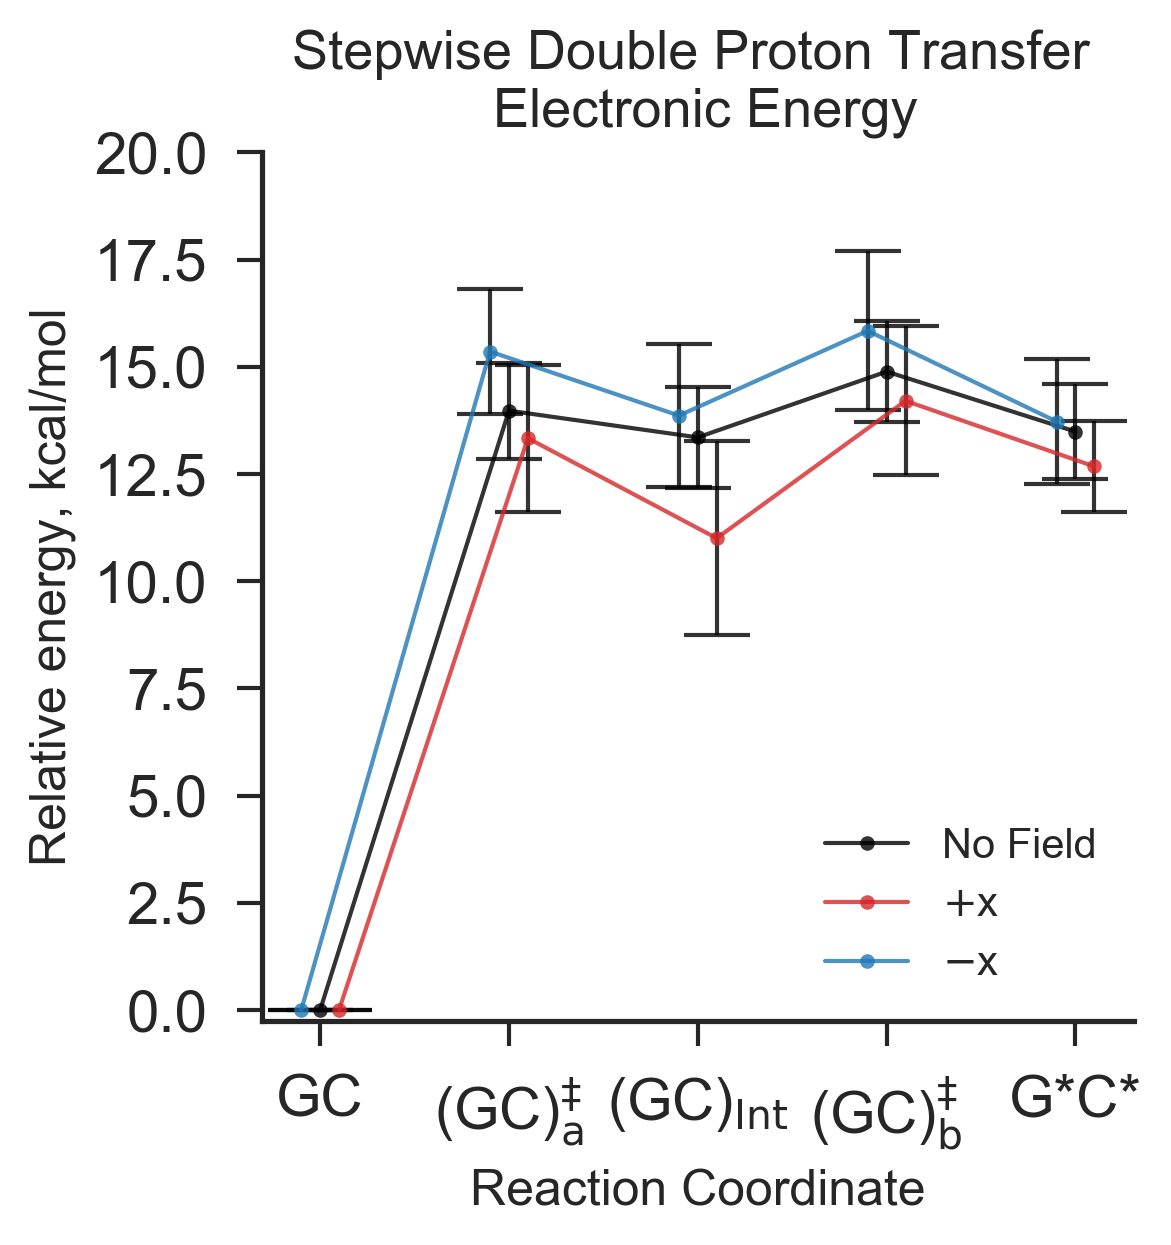

In [91]:
fig, ax = plt.subplots(dpi=300, figsize=(4,4.25))

# No Field
# Electronic Energy: Step-Wise DPT
plt.errorbar(x=np.arange(5), y=nf_step_e_mean, yerr=nf_step_e_std, ls='-',
             capsize=8, linewidth=1, c='k', alpha=0.8, capthick=True, ecolor='k', label='No Field', marker='.' )

# Positive X
# Electronic Energy: Step-Wise DPT
plt.errorbar(x=np.arange(5)+0.1, y=p_step_e_mean, yerr=p_step_e_std, ls='-',
             capsize=8, linewidth=1, c='tab:red', alpha=0.8, capthick=True, ecolor='k', label=r'$+$x', marker='.' )

# Negative X
# Electronic Energy: Step-Wise DPT
plt.errorbar(x=np.arange(5)-0.1, y=n_step_e_mean, yerr=n_step_e_std, ls='-',
             capsize=8, linewidth=1, c='tab:blue', alpha=0.8, capthick=True, ecolor='k', label=r'$-$x', marker='.' )

xlab=['GC', r'(GC)$^\ddag_\mathrm{a}$',r'(GC)$_{\mathrm{Int}}$',r'(GC)$^\ddag_\mathrm{b}$','G*C*']
plt.xticks(np.arange(len(xlab)), xlab, size=14)
plt.ylim((-0.25,20))
plt.yticks(size=14)

plt.xlabel('Reaction Coordinate', size= 12)
plt.ylabel('Relative energy, kcal/mol',size=12)

# get handles
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles, labels, loc='lower right',numpoints=1, ncol=1, fontsize=10)

plt.title('Stepwise Double Proton Transfer \n Electronic Energy', fontsize=13)

sns.despine()
plt.tight_layout()

## Step-Wise Gibs

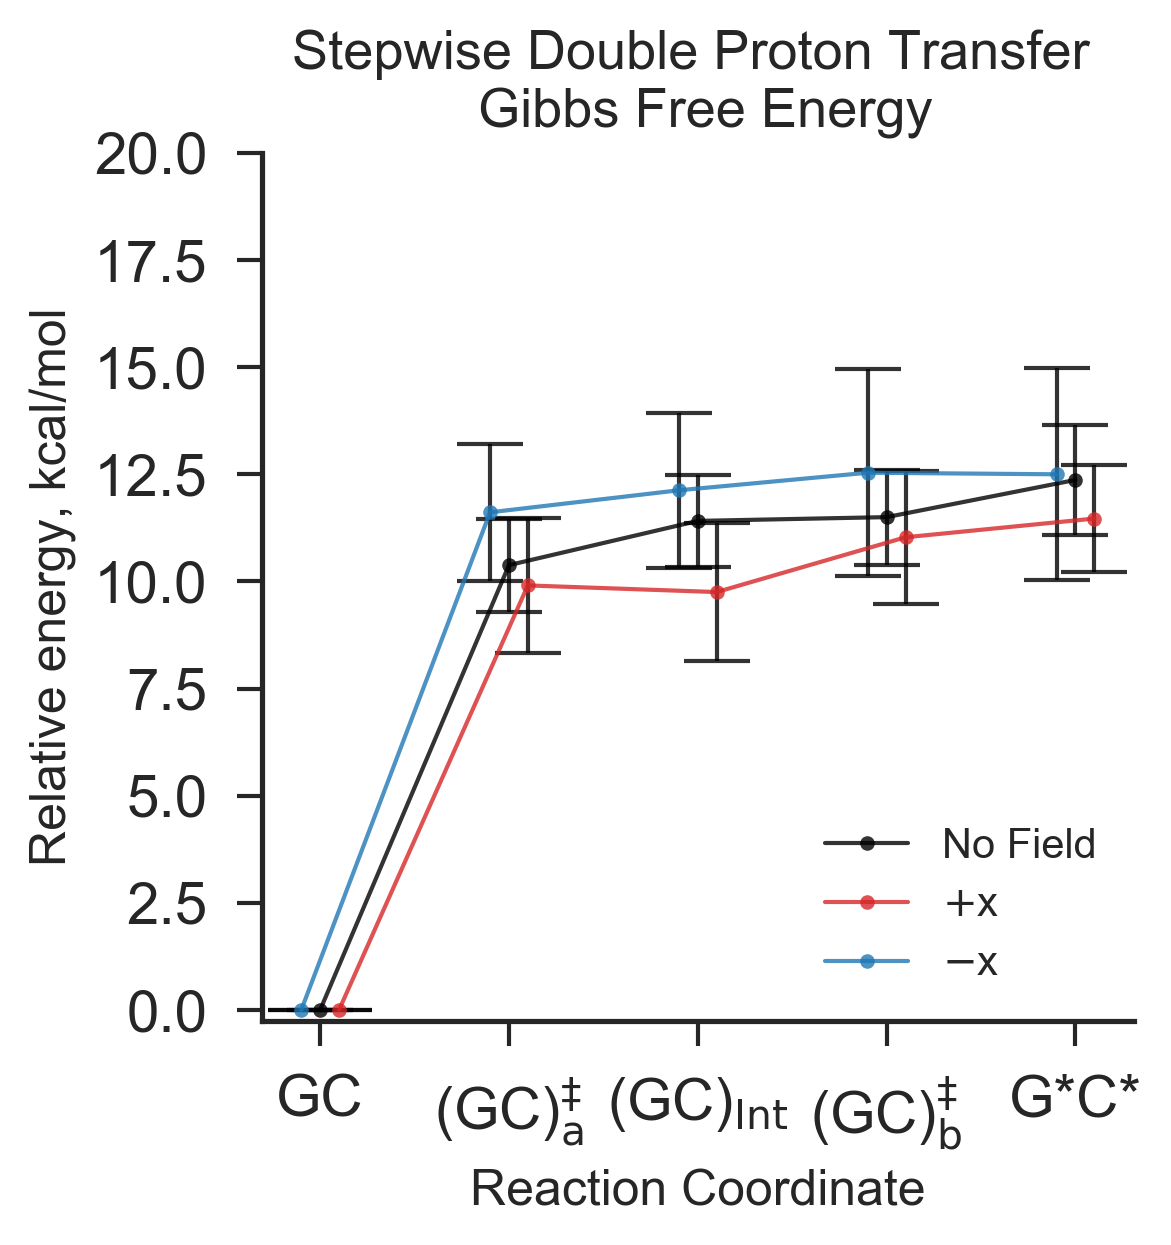

In [92]:
fig, ax = plt.subplots(dpi=300, figsize=(4,4.25))

# No Field
# Electronic Energy: Step-Wise DPT
plt.errorbar(x=np.arange(5), y=nf_step_gibbs_mean, yerr=nf_step_gibbs_std, ls='-',
             capsize=8, linewidth=1, c='k', alpha=0.8, capthick=True, ecolor='k', label='No Field', marker='.' )

# Positive X
# Electronic Energy: Step-Wise DPT
plt.errorbar(x=np.arange(5)+0.1, y=p_step_gibbs_mean, yerr=p_step_gibbs_std, ls='-',
             capsize=8, linewidth=1, c='tab:red', alpha=0.8, capthick=True, ecolor='k' , label=r'$+$x', marker='.' )

# Negative X
# Electronic Energy: Step-Wise DPT
plt.errorbar(x=np.arange(5)-0.1, y=n_step_gibbs_mean, yerr=n_step_gibbs_std, ls='-',
             capsize=8, linewidth=1, c='tab:blue', alpha=0.8, capthick=True, ecolor='k' , label=r'$-$x', marker='.' )

xlab=['GC', r'(GC)$^\ddag_\mathrm{a}$',r'(GC)$_{\mathrm{Int}}$',r'(GC)$^\ddag_\mathrm{b}$','G*C*']
plt.xticks(np.arange(len(xlab)), xlab, size=14)
plt.ylim((-0.25,20))
plt.yticks(size=14)

plt.xlabel('Reaction Coordinate', size= 12)
plt.ylabel('Relative energy, kcal/mol',size=12)

# get handles
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles, labels, loc='lower right',numpoints=1, ncol=1, fontsize=10)

plt.title('Stepwise Double Proton Transfer \n Gibbs Free Energy', fontsize=13)

sns.despine()
plt.tight_layout()

## Concerted Electronic 

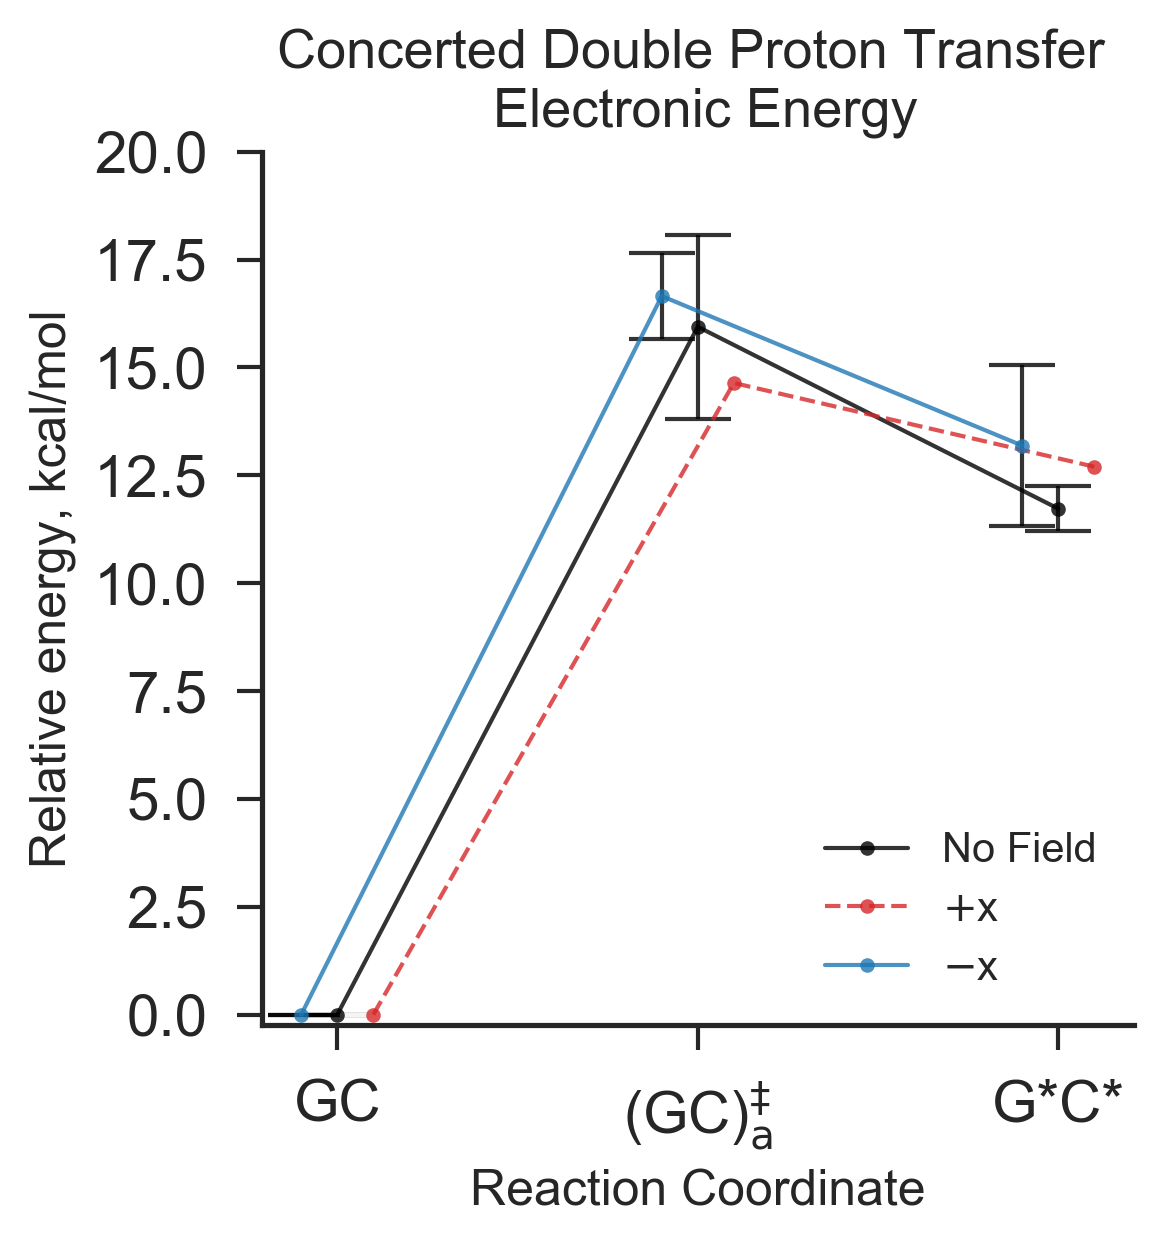

In [93]:
fig, ax = plt.subplots(dpi=300, figsize=(4,4.25))

# No Field
# Electronic Energy: Concered DPT
plt.errorbar(x=np.arange(3), y=nf_conc_e_mean, yerr=nf_conc_e_std, ls='-',
             capsize=8, linewidth=1, c='k', alpha=0.8, capthick=True, ecolor='k', label='No Field', marker='.' )

# Positive X
# Electronic Energy: Concerted DPT
plt.errorbar(x=np.arange(3)+0.1, y=p_conc_e_mean, yerr=p_conc_e_std, ls='--',
             capsize=8, linewidth=1, c='tab:red', alpha=0.8, capthick=True, ecolor='white', label=r'$+$x', marker='.' )

# Negative X
# Electronic Energy: Concerted DPT
plt.errorbar(x=np.arange(3)-0.1, y=n_conc_e_mean, yerr=n_conc_e_std, ls='-',
             capsize=8, linewidth=1, c='tab:blue', alpha=0.8, capthick=True, ecolor='k' , label=r'$-$x', marker='.' )

xlab=['GC', r'(GC)$^\ddag_\mathrm{a}$','G*C*']
plt.xticks(np.arange(len(xlab)), xlab, size=14)
plt.ylim((-0.25,20))
plt.yticks(size=14)

plt.xlabel('Reaction Coordinate', size= 12)
plt.ylabel('Relative energy, kcal/mol',size=12)

# get handles
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles, labels, loc='lower right',numpoints=1, ncol=1, fontsize=10)

plt.title('Concerted Double Proton Transfer \n Electronic Energy', fontsize=13)

sns.despine()
plt.tight_layout()

## Concerted Gibbs 

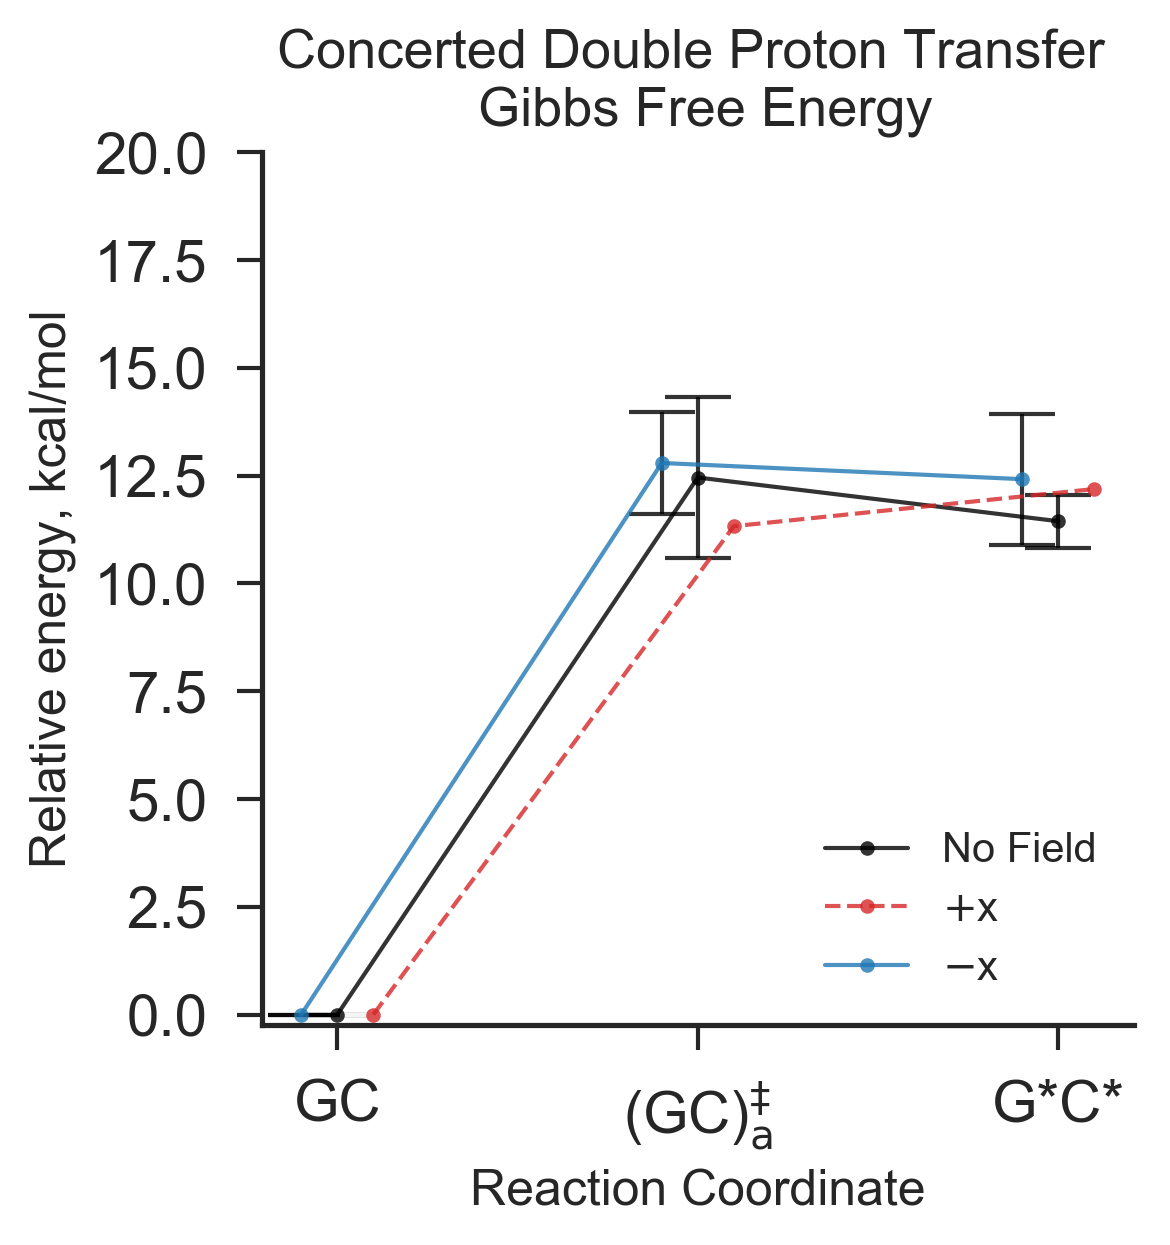

In [94]:
fig, ax = plt.subplots(dpi=300, figsize=(4,4.25))

# No Field
# Electronic Energy: Concered DPT
plt.errorbar(x=np.arange(3), y=nf_conc_gibbs_mean, yerr=nf_conc_gibbs_std, ls='-',
             capsize=8, linewidth=1, c='k', alpha=0.8, capthick=True, ecolor='k', label='No Field', marker='.' )

# Positive X
# Electronic Energy: Concerted DPT
plt.errorbar(x=np.arange(3)+0.1, y=p_conc_gibbs_mean, yerr=p_conc_gibbs_std, ls='--',
             capsize=8, linewidth=1, c='tab:red', alpha=0.8, capthick=True, ecolor='white', label=r'$+$x', marker='.' )

# Negative X
# Electronic Energy: Concerted DPT
plt.errorbar(x=np.arange(3)-0.1, y=n_conc_gibbs_mean, yerr=n_conc_gibbs_std, ls='-',
             capsize=8, linewidth=1, c='tab:blue', alpha=0.8, capthick=True, ecolor='k', label=r'$-$x', marker='.' )

xlab=['GC', r'(GC)$^\ddag_\mathrm{a}$','G*C*']
plt.xticks(np.arange(len(xlab)), xlab, size=14)
plt.ylim((-0.25,20))
plt.yticks(size=14)

plt.xlabel('Reaction Coordinate', size= 12)
plt.ylabel('Relative energy, kcal/mol',size=12)

# get handles
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles, labels, loc='lower right',numpoints=1, ncol=1, fontsize=10)

plt.title('Concerted Double Proton Transfer \n Gibbs Free Energy', fontsize=13)

sns.despine()
plt.tight_layout()

# SPT Electronic

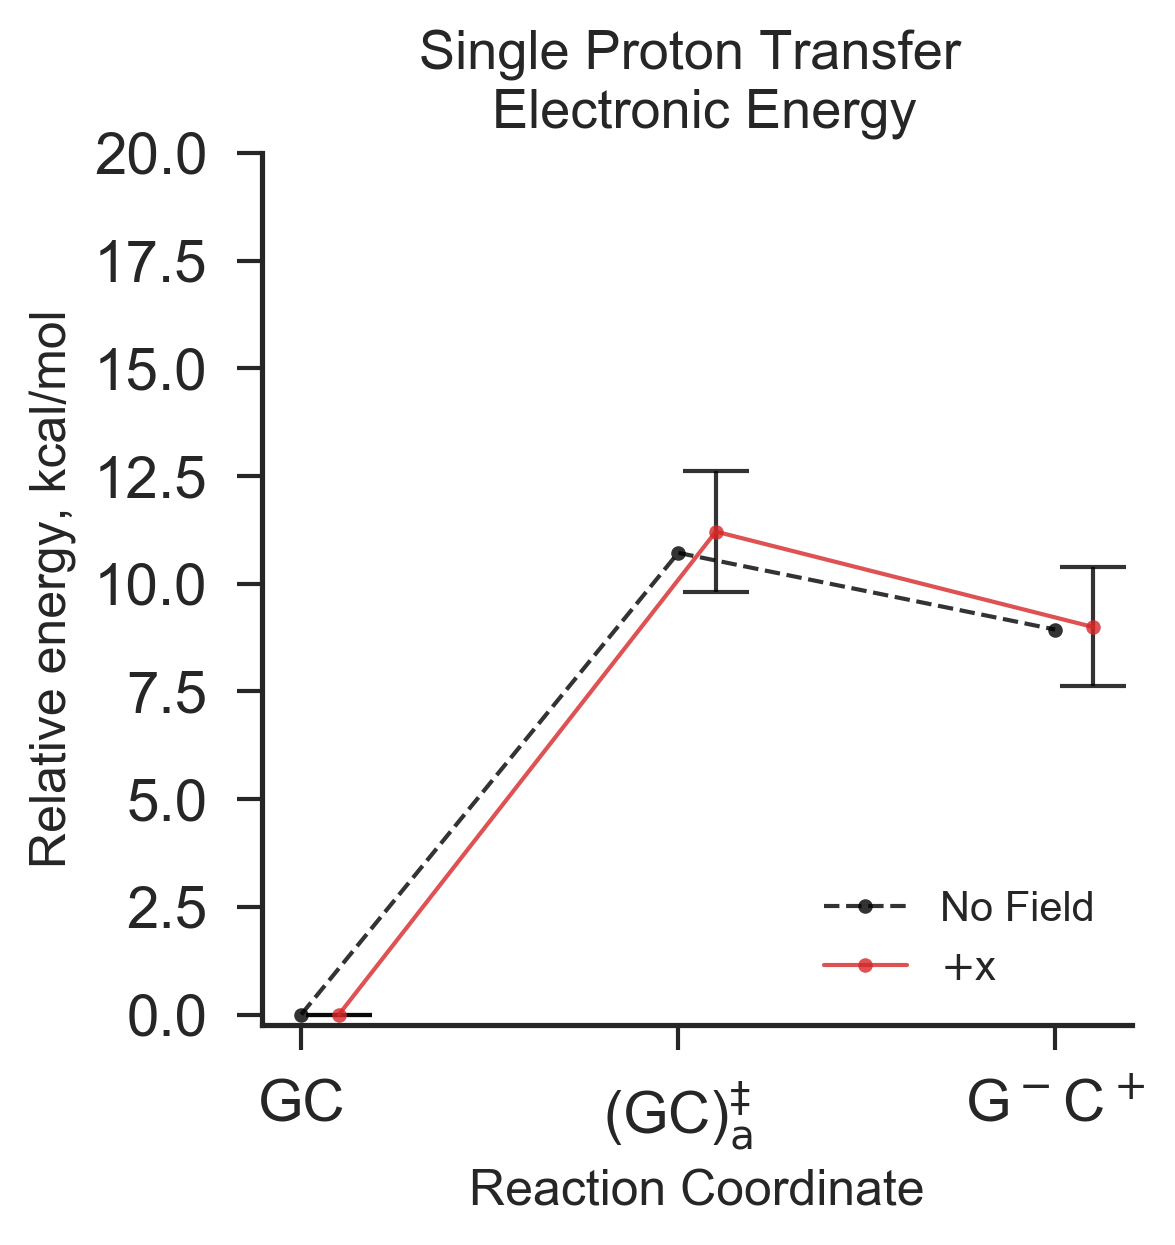

In [95]:
fig, ax = plt.subplots(dpi=300, figsize=(4,4.25))
# No Field
# Electronic Energy: Concered SPT
plt.errorbar(x=np.arange(3), y=nf_spt_e_mean, yerr=nf_spt_e_std, ls='--',
             capsize=8, linewidth=1, c='k', alpha=0.8, capthick=True, ecolor='white', label='No Field', marker='.' )

# Positive X
# Electronic Energy: Concerted SPT
plt.errorbar(x=np.arange(3)+0.1, y=p_spt_e_mean, yerr=p_spt_e_std, ls='-',
             capsize=8, linewidth=1, c='tab:red', alpha=0.8, capthick=True, ecolor='k' , label=r'$+$x', marker='.' )

# Negative X
# Electronic Energy: Concerted SPT
#plt.errorbar(x=np.arange(3)-0.1, y=n_spt_e_mean, yerr=n_spt_e_std, ls='-',
#             capsize=8, linewidth=1, c='tab:blue', alpha=0.8, capthick=True, ecolor='k', label=r'$-$x' )

xlab=['GC', r'(GC)$^\ddag_\mathrm{a}$','G$^-$C$^+$']
plt.xticks(np.arange(len(xlab)), xlab, size=14)
plt.ylim((-0.25,20))
plt.yticks(size=14)

plt.xlabel('Reaction Coordinate', size= 12)
plt.ylabel('Relative energy, kcal/mol',size=12)

# get handles
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles, labels, loc='lower right',numpoints=1, ncol=1, fontsize=10)

plt.title('Single Proton Transfer \n Electronic Energy', fontsize=13)

sns.despine()
plt.tight_layout()

# SPT GIBBS


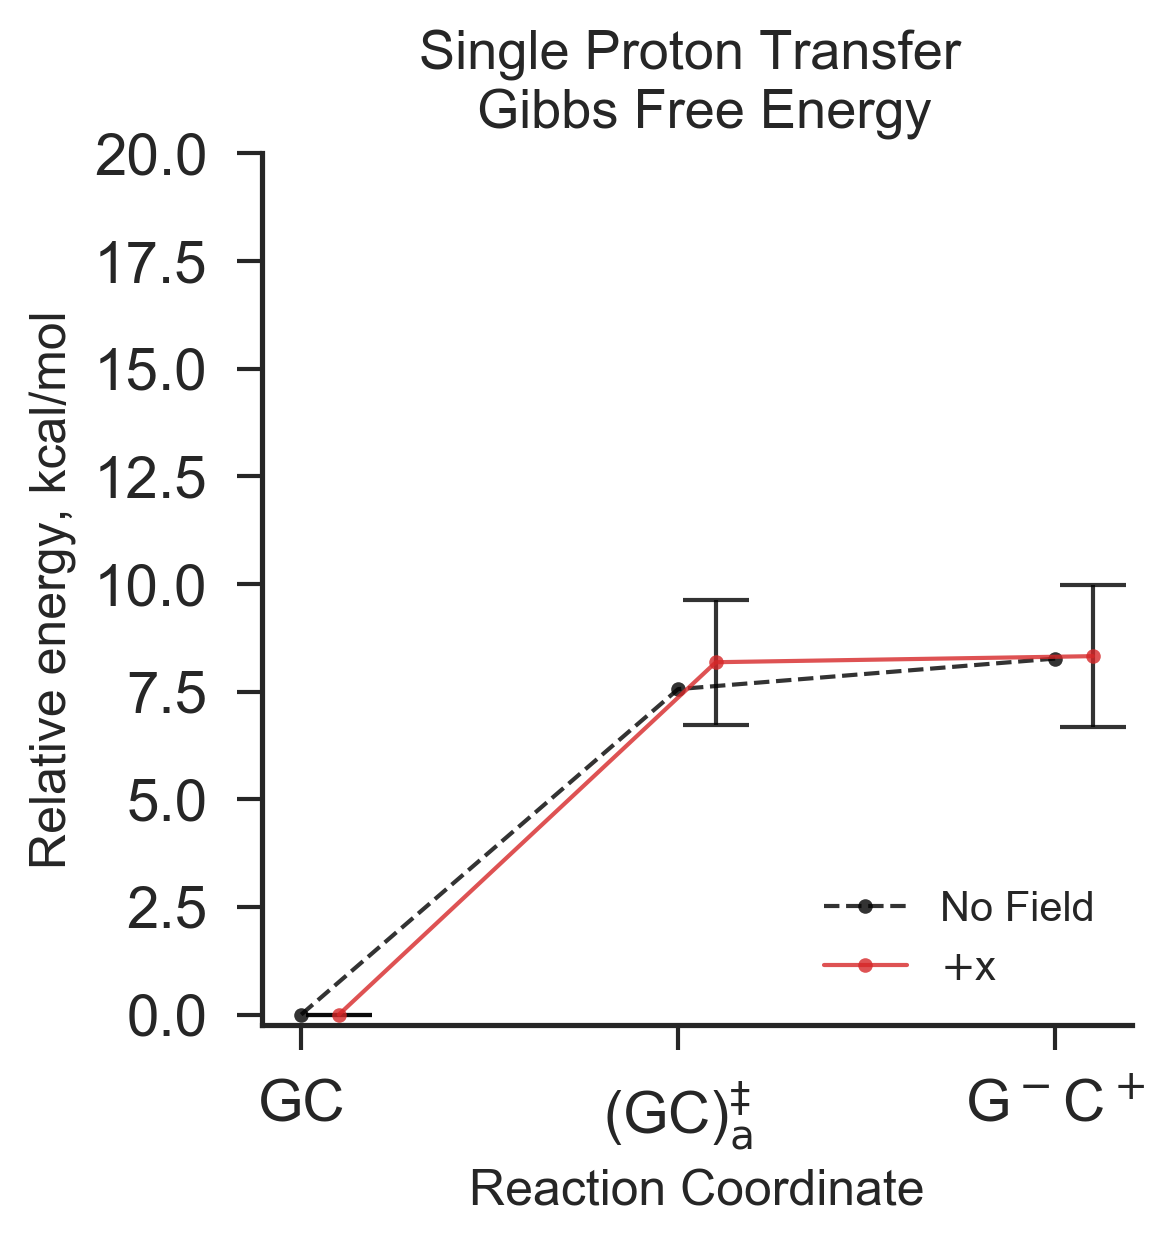

In [96]:
fig, ax = plt.subplots(dpi=300, figsize=(4,4.25))


# No Field
# Electronic Energy: Concered DPT
plt.errorbar(x=np.arange(3), y=nf_spt_gibbs_mean, yerr=nf_spt_gibbs_std, ls='--',
             capsize=8, linewidth=1, c='k', alpha=0.8, capthick=True, ecolor='w', label='No Field', marker='.' )

# Positive X
# Electronic Energy: Concerted DPT
plt.errorbar(x=np.arange(3)+0.1, y=p_spt_gibbs_mean, yerr=p_spt_gibbs_std, ls='-',
             capsize=8, linewidth=1, c='tab:red', alpha=0.8, capthick=True, ecolor='k', label=r'$+$x', marker='.' )

# Negative X
# Electronic Energy: Concerted DPT
#plt.errorbar(x=np.arange(3)-0.1, y=n_conc_gibbs_mean, yerr=n_conc_gibbs_std, ls='-',
#             capsize=8, linewidth=1, c='tab:blue', alpha=0.8, capthick=True, ecolor='k' , label=r'$-$x' )

xlab=['GC', r'(GC)$^\ddag_\mathrm{a}$','G$^-$C$^+$']
plt.xticks(np.arange(len(xlab)), xlab, size=14)
plt.ylim((-0.25,20))
plt.yticks(size=14)

plt.xlabel('Reaction Coordinate', size= 12)
plt.ylabel('Relative energy, kcal/mol',size=12)

# get handles
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles, labels, loc='lower right',numpoints=1, ncol=1, fontsize=10)

plt.title('Single Proton Transfer \n Gibbs Free Energy', fontsize=13)

sns.despine()
plt.tight_layout()

# Alternate graphs (to see trends)

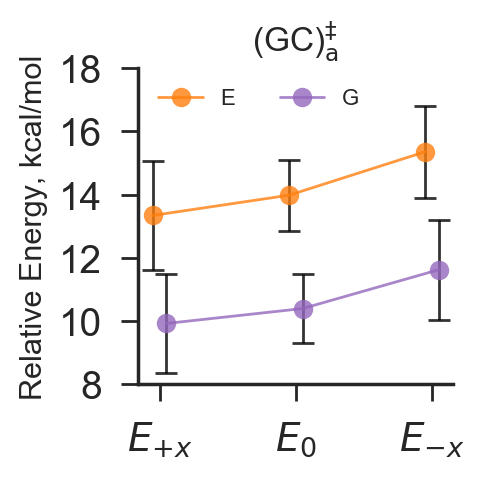

In [97]:
fig, ax = plt.subplots(dpi=200, figsize=(2.5,2.5))

plt.errorbar(x=np.arange(3)-0.05, 
             y=[p_step_e_mean[1], nf_step_e_mean[1], n_step_e_mean[1]], 
             yerr=[p_step_e_std[1], nf_step_e_std[1], n_step_e_std[1]], 
             ls='-', capsize=4, linewidth=1, c='tab:orange', alpha=0.8, capthick=True, ecolor='k', marker='o', label='E')


plt.errorbar(x=np.arange(3)+0.05, 
             y=[p_step_gibbs_mean[1], nf_step_gibbs_mean[1], n_step_gibbs_mean[1]], 
             yerr=[p_step_gibbs_std[1], nf_step_gibbs_std[1], n_step_gibbs_std[1]], 
             ls='-', capsize=4, linewidth=1, c='tab:purple', alpha=0.8, capthick=True, ecolor='k', marker='o', label='G')
    
xlab=[r'$E_{+x}$', r'$E_{0}$',r'$E_{-x}$']
plt.xticks(np.arange(len(xlab)), xlab, size=14)
plt.yticks(size=14)
plt.ylim((8,18))

#plt.xlabel('Electric Field', size= 12)
plt.ylabel('Relative Energy, kcal/mol',size=11)

# get handles
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles, labels, loc='upper left',numpoints=1, ncol=3, fontsize=8)

plt.title(r'(GC)$^\ddag_\mathrm{a}$')
#plt.legend()

sns.despine()
plt.tight_layout()

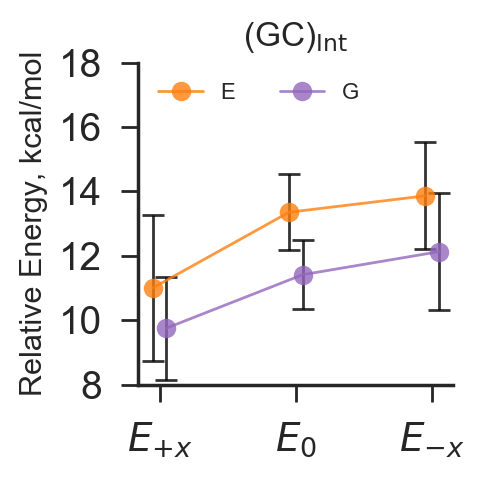

In [98]:
fig, ax = plt.subplots(dpi=200, figsize=(2.5,2.5))

plt.errorbar(x=np.arange(3)-0.05, 
             y=[p_step_e_mean[2], nf_step_e_mean[2], n_step_e_mean[2]], 
             yerr=[p_step_e_std[2], nf_step_e_std[2], n_step_e_std[2]], 
             ls='-', capsize=4, linewidth=1, c='tab:orange', alpha=0.8, capthick=True, ecolor='k', marker='o', label='E')


plt.errorbar(x=np.arange(3)+0.05, 
             y=[p_step_gibbs_mean[2], nf_step_gibbs_mean[2], n_step_gibbs_mean[2]], 
             yerr=[p_step_gibbs_std[2], nf_step_gibbs_std[2], n_step_gibbs_std[2]], 
             ls='-', capsize=4, linewidth=1, c='tab:purple', alpha=0.8, capthick=True, ecolor='k', marker='o', label='G')
    
xlab=[r'$E_{+x}$', r'$E_{0}$',r'$E_{-x}$']
plt.xticks(np.arange(len(xlab)), xlab, size=14)
plt.yticks(size=14)
plt.ylim((8,18))

#plt.xlabel('Electric Field', size= 12)
plt.ylabel('Relative Energy, kcal/mol',size=11)

# get handles
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles, labels, loc='upper left',numpoints=1, ncol=3, fontsize=8)

plt.title(r'(GC)$_{\mathrm{Int}}$')
sns.despine()
plt.tight_layout()

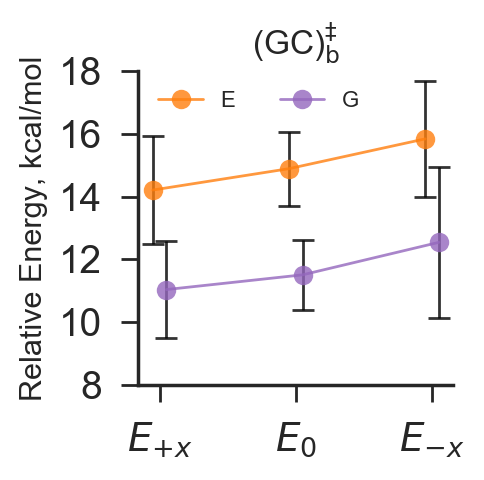

In [99]:
fig, ax = plt.subplots(dpi=200, figsize=(2.5,2.5))

plt.errorbar(x=np.arange(3)-0.05, 
             y=[p_step_e_mean[3], nf_step_e_mean[3], n_step_e_mean[3]], 
             yerr=[p_step_e_std[3], nf_step_e_std[3], n_step_e_std[3]], 
             ls='-', capsize=4, linewidth=1, c='tab:orange', alpha=0.8, capthick=True, ecolor='k', marker='o', label='E')


plt.errorbar(x=np.arange(3)+0.05, 
             y=[p_step_gibbs_mean[3], nf_step_gibbs_mean[3], n_step_gibbs_mean[3]], 
             yerr=[p_step_gibbs_std[3], nf_step_gibbs_std[3], n_step_gibbs_std[3]], 
             ls='-', capsize=4, linewidth=1, c='tab:purple', alpha=0.8, capthick=True, ecolor='k', marker='o', label='G')
    
xlab=[r'$E_{+x}$', r'$E_{0}$',r'$E_{-x}$']
plt.xticks(np.arange(len(xlab)), xlab, size=14)
plt.yticks(size=14)
plt.ylim((8,18))

#plt.xlabel('Electric Field', size= 12)
plt.ylabel('Relative Energy, kcal/mol',size=11)

# get handles
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
# use them in the legend
ax.legend(handles, labels, loc='upper left',numpoints=1, ncol=3, fontsize=8)

#plt.legend()
plt.title(r'(GC)$^\ddag_\mathrm{b}$')

sns.despine()
plt.tight_layout()

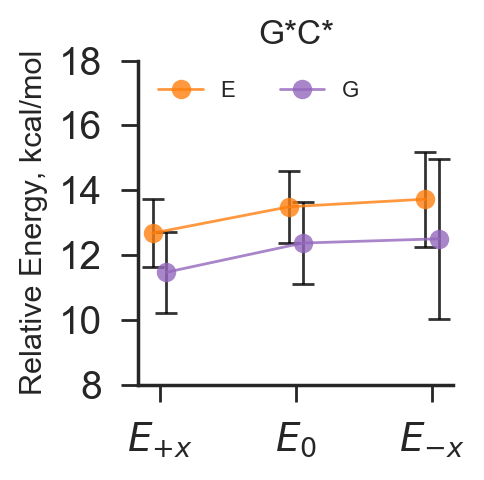

In [100]:
fig, ax = plt.subplots(dpi=200, figsize=(2.5,2.5))

plt.errorbar(x=np.arange(3)-0.05, 
             y=[p_step_e_mean[4], nf_step_e_mean[4], n_step_e_mean[4]], 
             yerr=[p_step_e_std[4], nf_step_e_std[4], n_step_e_std[4]], 
             ls='-', capsize=4, linewidth=1, c='tab:orange', alpha=0.8, capthick=True, ecolor='k', marker='o', label='E')


plt.errorbar(x=np.arange(3)+0.05, 
             y=[p_step_gibbs_mean[4], nf_step_gibbs_mean[4], n_step_gibbs_mean[4]], 
             yerr=[p_step_gibbs_std[4], nf_step_gibbs_std[4], n_step_gibbs_std[4]], 
             ls='-', capsize=4, linewidth=1, c='tab:purple', alpha=0.8, capthick=True, ecolor='k', marker='o', label='G')
    
xlab=[r'$E_{+x}$', r'$E_{0}$',r'$E_{-x}$']
plt.xticks(np.arange(len(xlab)), xlab, size=14)
plt.yticks(size=14)
plt.ylim((8,18))

#plt.xlabel('Electric Field', size= 12)
plt.ylabel('Relative Energy, kcal/mol',size=11)

# get handles
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
handles = [h[0] for h in handles]
ax.legend(handles, labels, loc='upper left',numpoints=1, ncol=3, fontsize=8)

plt.title('G*C*')

sns.despine()
plt.tight_layout()